In [36]:
# Importation et chargement des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, cluster

In [2]:
# Chargement du dataset
retail_df = pd.read_csv("../data/online_retail_II.csv")
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [3]:
retail_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
# Conversion de la colonne InnvoiceDate en "datetime"
retail_df["InvoiceDateTime"] = pd.to_datetime(retail_df["InvoiceDate"], errors="coerce")
retail_df.info()
retail_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   Invoice          1067371 non-null  object        
 1   StockCode        1067371 non-null  object        
 2   Description      1062989 non-null  object        
 3   Quantity         1067371 non-null  int64         
 4   InvoiceDate      1067371 non-null  object        
 5   Price            1067371 non-null  float64       
 6   Customer ID      824364 non-null   float64       
 7   Country          1067371 non-null  object        
 8   InvoiceDateTime  1067371 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 73.3+ MB


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDateTime
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01 07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01 07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01 07:45:00


In [5]:
# Cleaning du dataframe
# Suppression des clients non identfiés
retail_df.dropna(subset=["Customer ID"], inplace=True)

# Suppression des doublons
retail_df.drop_duplicates(inplace=True)

# Filtrage du dataset pour écarter les valeurs négatives (les retours de produits) sur les colonnes "Quantity" et "Price"
df_filtred = retail_df[(retail_df["Quantity"] > 0) & (retail_df["Price"] > 0)]

# Affichage des modifications
print(f"Les nouvelles dimensions du dataframe filtré : {df_filtred.shape}")
df_filtred.info()
df_filtred.head()

Les nouvelles dimensions du dataframe filtré : (779425, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 779425 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Invoice          779425 non-null  object        
 1   StockCode        779425 non-null  object        
 2   Description      779425 non-null  object        
 3   Quantity         779425 non-null  int64         
 4   InvoiceDate      779425 non-null  object        
 5   Price            779425 non-null  float64       
 6   Customer ID      779425 non-null  float64       
 7   Country          779425 non-null  object        
 8   InvoiceDateTime  779425 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 59.5+ MB


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDateTime
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01 07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01 07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01 07:45:00


In [29]:
# Création de la colonne "TotalAmount"
df_filtred["TotalAmount"] = df_filtred["Quantity"] * df_filtred["Price"]

# Définition de la date référence de calcul
ref_date = df_filtred["InvoiceDateTime"].max() + pd.Timedelta(days=1)
print(f"Date de référence pour l'analyse : {ref_date}")

# Détermination du RFM
rfm = df_filtred.groupby("Customer ID").agg({
    "InvoiceDateTime": lambda x : (ref_date - x.max()).days,
    "Invoice":"nunique",
    "TotalAmount":"sum"
})

# Renommage des colonnes pour plus de clarté
rfm.rename(columns={
    "InvoiceDateTime":"Recency",    # RECENCY : Date Ref - Date Max du client
    "Invoice":"Frequency",          # FREQUENCY : Compte les factures UNIQUES
    "TotalAmount":"Monetary"},      # MONETARY : Somme des montants
    inplace=True)

# Affichage
rfm.head()

C:\Users\toubo\AppData\Local\Temp\ipykernel_57744\2320370072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtred["TotalAmount"] = df_filtred["Quantity"] * df_filtred["Price"]


Date de référence pour l'analyse : 2011-12-10 12:50:00


,Recency,Frequency,Monetary
Customer ID,,,
12346.0,326,12,77556.46
12347.0,2,8,4921.53
12348.0,75,5,2019.40
12349.0,19,4,4428.69
12350.0,310,1,334.40


In [35]:
# Standardisation du dataset
# Instanciation du Scaler
scaler = preprocessing.StandardScaler()

# Transformation des données
rfm_scaled_array = scaler.fit_transform(rfm)

# Transformation des données standardisées en dataframes
rfm_scaled = pd.DataFrame(data=rfm_scaled_array, index=rfm.index, columns=rfm.columns)

# Affichage
rfm_scaled.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,0.595584,0.438998,5.166378
12347.0,-0.952279,0.131502,0.136127
12348.0,-0.603532,-0.099120,-0.064857
12349.0,-0.871064,-0.175994,0.101996
12350.0,0.519146,-0.406616,-0.181549


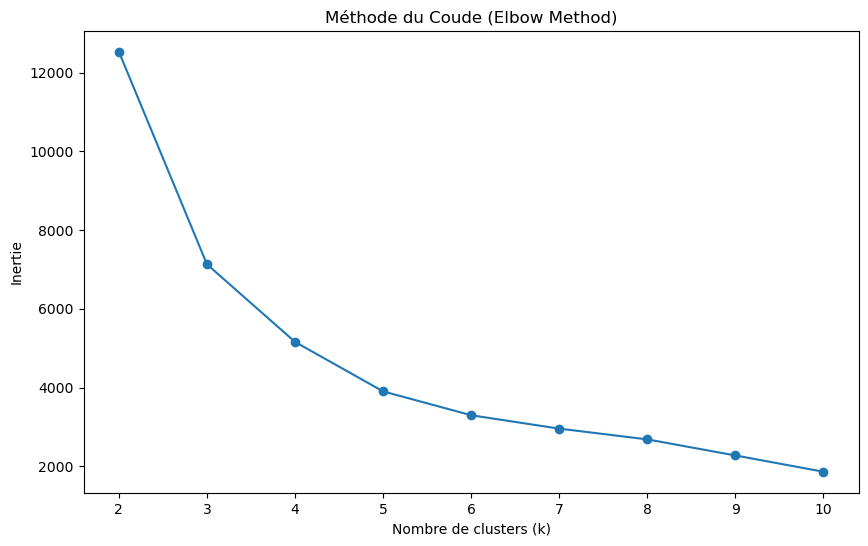

In [ ]:
# Clustering avec KMeans : Recherche du nombre de cluster idéal avec la methode elbow
# Définition du nombre de cluster
range_min = 2
range_max = 11
k_range=range(range_min, range_max)

inertia = []

# Recherche du nombre de cluster idéal
for k in k_range :
    kmeans = cluster.KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Afichage du graphe
plt.figure(figsize=(10,6))
plt.plot(k_range, inertia, marker='o')
plt.title('Méthode du Coude (Elbow Method)')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.show()

In [ ]:
# Clustering avec KMeans : Choix de 5 comme nombre de cluster idéal
kmeans_final = cluster.KMeans(n_clusters=5, random_state=42)

# Entrainement du modèle avec le nombre de cluster idéal
kmeans_final.fit(rfm_scaled)

# Ajout des labels des clusters au dataset de base (rfm)
rfm["Cluster"] = kmeans_final.labels_

# Affichage
print(rfm["Cluster"].value_counts())
rfm.head()


Cluster
4    3553
0    1917
1     380
2      24
3       4
Name: count, dtype: int64


,Recency,Frequency,Monetary,Cluster
Customer ID,,,,
12346.0,326,12,77556.46,1
12347.0,2,8,4921.53,4
12348.0,75,5,2019.40,4
12349.0,19,4,4428.69,4
12350.0,310,1,334.40,0


In [ ]:
# Reformatage du dataframe
rfm.reset_index(inplace=True)

# Identification des clusters
cluster_summary = rfm.groupby("Cluster").agg({
    "Recency": "mean",
    "Frequency": "mean",
    "Monetary": "mean",
    "Customer ID": "count" 
}).round(2) 

# Renommage des colonnes
cluster_summary.rename(columns={"Customer ID":"Count"}, inplace=True)

# Trie et Affichage
print(cluster_summary.sort_values("Monetary", ascending=False))

         Recency  Frequency   Monetary  Count
Cluster                                      
3           3.50     212.50  428612.00      4
2          22.46     119.79   98956.85     24
1          28.06      28.62   13662.78    380
4          75.67       5.13    1879.46   3553
0         471.23       2.17     738.56   1917


In [ ]:
# Profilages des clusters
# Dictionnaire de correspondance
segment_names = {
    3: "Champions 🏆",
    2: "Loyal Customers 🥈",
    1: "Prometteurs 🌱",
    4: "À Risque ⚠️",
    0: "Perdus 💤"
}

# On applique les noms dans une nouvelle colonne
rfm['Segment'] = rfm['Cluster'].map(segment_names)

# Vérification finale
print(rfm[['Customer ID', 'Segment', 'Recency', 'Frequency', 'Monetary']].head())

   Customer ID        Segment  Recency  Frequency  Monetary
0      12346.0  Prometteurs 🌱      326         12  77556.46
1      12347.0    À Risque ⚠️        2          8   4921.53
2      12348.0    À Risque ⚠️       75          5   2019.40
3      12349.0    À Risque ⚠️       19          4   4428.69
4      12350.0       Perdus 💤      310          1    334.40


In [58]:
# Sauvegarde du résultat final dans le dossier data
rfm.to_csv('../data/rfm_segmented.csv', index=False)